# Tratamento da informação dos questionários: 

In [1]:
import pandas as pd
import numpy as np

In [7]:
df = pd.read_excel('Questionário Sociodemográfico.xlsx')
df.head(5)
df.shape
print(df.columns)
df = df.drop(7)
print(df)

Index(['Carimbo de data/hora', 'Código de participante', 'Idade', 'Sexo',
       'Nacionalidade', 'Escolaridade (completa)', 'Lateralidade',
       'Língua materna', 'Situação profissional',
       'Tem algum problema do foro psicológico ou psiquiátrico (por exemplo: depressão, perturbação de ansiedade, perturbação do sono, etc)?',
       'Se respondeu 'Sim', especifique, por favor',
       'Tem algum outro problema de saúde (por exemplo: patologia cardíaca, insuficiência respiratória, etc)?',
       'Se respondeu 'Sim', especifique, por favor.1',
       'Apresenta algum problema de visão?',
       'Se respondeu 'Sim', está corrigido para o normal (através de óculos ou lentes)?',
       'Toma alguma medicação?',
       'Se respondeu 'Sim', especifique qual/quais, por favor:',
       'Recentemente esteve exposto a alguma situação emocionalmente intensa? (ex. exame de condução, falecimento de um familiar, exame escolar, foi a uma festa importante para si, etc)',
       'Se respondeu 'Sim

In [8]:
df1 = df[['Idade','Sexo','Nacionalidade','Situação profissional']]
df1.head()
df1.shape

(29, 4)

In [9]:
df2 = df.drop(df.columns[[0,1,10,12,14,16,18,20,22]],axis=1)
df2.head()
df2.columns

Index(['Idade', 'Sexo', 'Nacionalidade', 'Escolaridade (completa)',
       'Lateralidade', 'Língua materna', 'Situação profissional',
       'Tem algum problema do foro psicológico ou psiquiátrico (por exemplo: depressão, perturbação de ansiedade, perturbação do sono, etc)?',
       'Tem algum outro problema de saúde (por exemplo: patologia cardíaca, insuficiência respiratória, etc)?',
       'Apresenta algum problema de visão?', 'Toma alguma medicação?',
       'Recentemente esteve exposto a alguma situação emocionalmente intensa? (ex. exame de condução, falecimento de um familiar, exame escolar, foi a uma festa importante para si, etc)',
       'Costuma beber café ou consumir produtos com cafeína?',
       'Pratica exercício físico regularmente?'],
      dtype='object')

### Age:

How many different ages exist in the dataframe:
8


[Text(0.5, 1.0, 'Participants age'),
 Text(0.5, 0, 'Age'),
 Text(0, 0.5, 'Number of participants')]

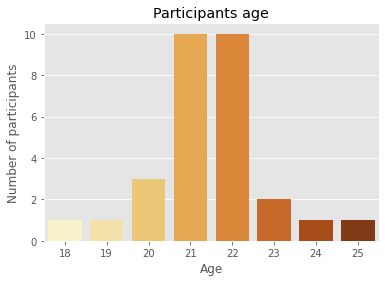

In [25]:
b = df1['Idade'].nunique()
print('How many different ages exist in the dataframe:')
print(b) 
#df1.hist(column='Idade',bins=8, grid=False)
import seaborn as sns
#sns.distplot(df1['Idade'],bins=8,kde=False)

sns.countplot(x='Idade',data=df1, palette = "YlOrBr").set(title='Participants age', xlabel='Age', ylabel='Number of participants' )


In [20]:
st_dev = df1['Idade'].std()
idade_mean = df1['Idade'].mean()
print('Age standard Deviation:')
print(round(st_dev,2))
print('Age mean:')
print(round(idade_mean,2))

Age standard Deviation:
1.38
Age mean:
21.45


### Gender:

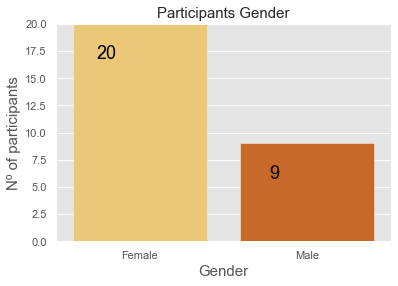

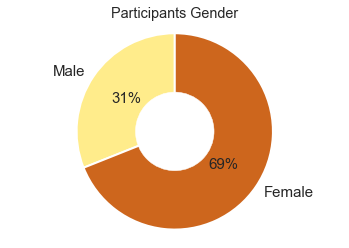

In [29]:
import matplotlib.pyplot as plt
sexo_map = df1['Sexo'].map({'Feminino':0, 'Masculino':1})
sexo = df1['Sexo']
df3 = pd.DataFrame({'Sexo':sexo, 'Mapeamento':sexo_map})
plt.figure(1)
ax = sns.countplot(x='Mapeamento', data=df3,palette = "YlOrBr") #ax=axs[0])#.set(title='Participants Sex',xlabel='Sex', ylabel='Number of participants' )

#ax.bar_label(ax.containers[0])

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=18)
ax.set_title('Participants Gender', y=1, fontsize=15)
ax.set_xlabel('Gender',fontsize=15)
ax.set_ylabel('Nº of participants',fontsize=15)
ax.set_xticklabels(('Female', 'Male'))


plt.figure(2)
textprops = {"fontsize":15}
label = ['Male','Female']
perc_sex = [9,20]
plt.style.use('ggplot')
plt.title('Participants Gender')
my_circle = plt.Circle( (0,0), 0.4, color='white')
colors1 = ["#FFEC8B",'#CD661D']
plt.pie(x = perc_sex, labels=label, autopct='%.0f%%',shadow=False,startangle=90, textprops= textprops,wedgeprops = { 'linewidth' : 2, 'edgecolor' : 'white' }, colors = colors1)
plt.axis('equal')
#plt.legend(loc='upper left', fontsize=15)
p = plt.gcf()
p.gca().add_artist(my_circle)
plt.show()


Nº of students: 26
Nº of working students: 2
Nº of others situations: 1
Nº of students: 26
Nº of working students: 2
Nº of others situations: 1


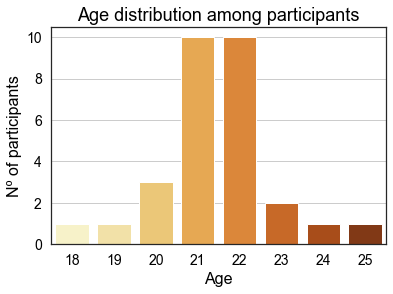

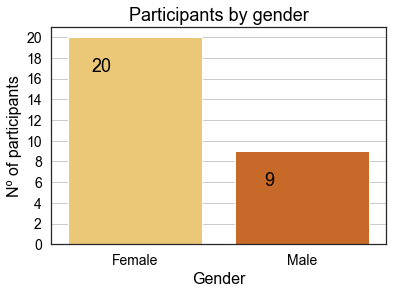

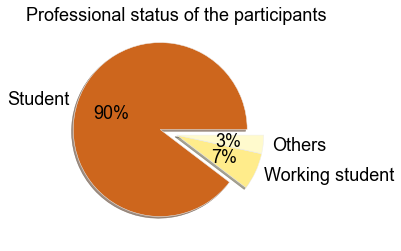

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

b = df1['Idade'].nunique()
plt.figure(1)
sns.set_theme(style='white')
ax1 = sns.countplot(x='Idade',data=df1, palette = "YlOrBr")#.set(title='Age distribution among participants', xlabel='Age', ylabel='Number of participants' )
ax1.set_title('Age distribution among participants', fontsize=18, color = 'black')
ax1.set_xlabel('Age',fontsize=16, color = 'black')
ax1.set_ylabel('Nº of participants',fontsize=16, color = 'black')
ax1.grid(axis="y")
plt.xticks(size = 14, color = 'black')
plt.yticks(size = 14, color = 'black')

sexo_map = df1['Sexo'].map({'Feminino':0, 'Masculino':1})
sexo = df1['Sexo']
df3 = pd.DataFrame({'Sexo':sexo, 'Mapeamento':sexo_map})
plt.figure(2)
sns.set_theme(style='white')
ax = sns.countplot(x='Mapeamento', data=df3,palette = "YlOrBr",dodge=False) #ax=axs[0])#.set(title='Participants Sex',xlabel='Sex', ylabel='Number of participants' )

import math
y = [0,2,4,6,8,10,12,14,16,18,20]

minimum_ele = min(y)
maximum_ele = max(y)
new_list = range(math.floor(min(y)), math.ceil(max(y))+1,2)

for p in ax.patches:
    ax.annotate(f'\n{p.get_height()}', (p.get_x()+0.2, p.get_height()), ha='center', va='top', color='black', size=18)
ax.set_title('Participants by gender', y=1, fontsize=18,color = 'black')
ax.set_xlabel('Gender',fontsize=16, color = 'black')
ax.set_ylabel('Nº of participants',fontsize=16, color = 'black')
#ax.grid(False)
ax.grid(axis="y")
ax.set_xticklabels(('Female', 'Male'))
plt.xticks(size = 14, color = 'black')
plt.yticks(new_list,size = 14, color = 'black')
ax.set_ylim([0,21])

sit_prof = df1['Situação profissional']
n_students = df1['Situação profissional'].value_counts()['Estudante']
print('Nº of students:',n_students)
n_working_students = df1['Situação profissional'].value_counts()['Trabalhador-estudante']
print('Nº of working students:',n_working_students)
n_others = df1['Situação profissional'].value_counts()['Outra']
print('Nº of others situations:',n_others)


plt.figure(3)
sit_prof = df1['Situação profissional']
n_students = df1['Situação profissional'].value_counts()['Estudante']
print('Nº of students:',n_students)
n_working_students = df1['Situação profissional'].value_counts()['Trabalhador-estudante']
print('Nº of working students:',n_working_students)
n_others = df1['Situação profissional'].value_counts()['Outra']
print('Nº of others situations:',n_others)

label = ["Student", "Working student", "Others"]
val = [26, 2, 1]
myexplode = [0.2,0,0]
plt.style.use('ggplot')
plt.title('Professional status of the participants',fontsize=18, color = 'black' )
textprops = {"fontsize":18, "color":'black'}
colors2 = ['#CD661D',"#FFEC8B","#FFFACD"]
plt.pie(x = val, labels = label, explode = myexplode,autopct='%.0f%%', shadow = True,textprops =textprops, colors = colors2)
plt.show() 


In [25]:
total = df3['Mapeamento'].count()
#print(total)
n_masc = df3['Mapeamento'].value_counts()[1]
#print(n_masc)
n_fem = df3['Mapeamento'].value_counts()[0]
#print(n_fem)
perc_masc = round((n_masc/total)*100,0)
perc_fem = round((n_fem/total)*100,0)
print('Percentage of masculin participants:', perc_masc,'%')
print('Percentage of feminin participants:', perc_fem, '%')

Percentage of masculin participants: 31.0 %
Percentage of feminin participants: 69.0 %


### Situação profissional:

Nº of students: 26
Nº of working students: 2
Nº of others situations: 1


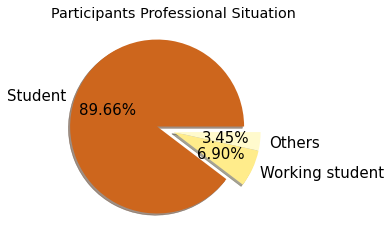

In [27]:
sit_prof = df1['Situação profissional']
n_students = df1['Situação profissional'].value_counts()['Estudante']
print('Nº of students:',n_students)
n_working_students = df1['Situação profissional'].value_counts()['Trabalhador-estudante']
print('Nº of working students:',n_working_students)
n_others = df1['Situação profissional'].value_counts()['Outra']
print('Nº of others situations:',n_others)

label = ["Student", "Working student", "Others"]
val = [26, 2, 1]
myexplode = [0.2,0,0]
plt.style.use('ggplot')
plt.title('Participants Professional Situation')
textprops = {"fontsize":15}
colors2 = ['#CD661D',"#FFEC8B","#FFFACD"]
plt.pie(x = val, labels = label, explode = myexplode,autopct='%.2f%%', shadow = True,textprops =textprops, colors = colors2)
plt.show() 

### Nacionalidade:

In [30]:
total = df2['Nacionalidade'].count()
print('Nº total de participantes:', total)
n_dif_resp = df2['Nacionalidade'].unique()
print('Respostas diferentes (Nacionalidade)', n_dif_resp)
n_pt = df2['Nacionalidade'].value_counts()['Portuguesa']+df2['Nacionalidade'].value_counts()['Portuguesa ']+df2['Nacionalidade'].value_counts()['Portugues']+df2['Nacionalidade'].value_counts()['Português']+df2['Nacionalidade'].value_counts()['portuguesa']
print('Nº de estudantes de nacionalidade portuguesa:',n_pt)
n_br  = df2['Nacionalidade'].value_counts()['Brasil']
print('Nº de estudantes de nacionalidade brasileira',n_br) 
perc_pt = round((n_pt/total)*100,2)
perc_br = round((n_br/total)*100,2)
print('Percentagem de portugueses:',perc_pt,'%')
print('Percentagem de brasileiros:',perc_br,'%')

Nº total de participantes: 29
Respostas diferentes (Nacionalidade) ['Portuguesa' 'Portuguesa ' 'Portugues' 'Português' 'portuguesa' 'Brasil']
Nº de estudantes de nacionalidade portuguesa: 28
Nº de estudantes de nacionalidade brasileira 1
Percentagem de portugueses: 96.55 %
Percentagem de brasileiros: 3.45 %


### Escolaridade completa:

In [31]:
n_dif_resp = df2['Escolaridade (completa)'].unique()
print('Respostas diferentes (Escolaridade completa):',n_dif_resp)
n_lic = df2['Escolaridade (completa)'].value_counts()['Licenciatura']
print('Nº de estudantes com licenciatura completa:',n_lic)
n_12 = df2['Escolaridade (completa)'].value_counts()['12º Ano']
print('Nº de estudantes com 12º ano apenas:',n_12)
perc_lic = round((n_lic/total)*100,2)
perc_n_12 = round((n_12/total)*100,2)
print('Percentagem de estudantes com licenciatura completa:', perc_lic,'%')
print('Percentagem de estudantes com 12ºano completo apenas:',perc_n_12, '%')

Respostas diferentes (Escolaridade completa): ['Licenciatura' '12º Ano']
Nº de estudantes com licenciatura completa: 16
Nº de estudantes com 12º ano apenas: 13
Percentagem de estudantes com licenciatura completa: 55.17 %
Percentagem de estudantes com 12ºano completo apenas: 44.83 %


### Lateralidade:

In [33]:
n_dif_resp = df2['Lateralidade'].unique()
print('Respostas diferentes (Lateralidade)', n_dif_resp)
n_dextro = df2['Lateralidade'].value_counts()['Dextro']
print('Nº de estudantes dextros:', n_dextro)
n_canhoto = df2['Lateralidade'].value_counts()['Canhoto']
print('Nº de estudantes canhotos:',n_canhoto)
perc_dextro = round((n_dextro/total)*100,2)
perc_canhoto = round((n_canhoto/total)*100,2)
print('Percentagem de estudantes dextros:',perc_dextro,'%')
print('Percentagem de estudantes canhotos:',perc_canhoto,'%')

Respostas diferentes (Lateralidade) ['Dextro' 'Canhoto']
Nº de estudantes dextros: 25
Nº de estudantes canhotos: 4
Percentagem de estudantes dextros: 86.21 %
Percentagem de estudantes canhotos: 13.79 %


### Mapeamento das respostas Sim/Não:

In [34]:
n_dif_resp = df2['Tem algum problema do foro psicológico ou psiquiátrico (por exemplo: depressão, perturbação de ansiedade, perturbação do sono, etc)?'].unique()
mapeamento = df2['Tem algum problema do foro psicológico ou psiquiátrico (por exemplo: depressão, perturbação de ansiedade, perturbação do sono, etc)?'].map({'Sim':1,'Não':0})
#print(n_dif_resp)

n_dif_resp = df2['Tem algum outro problema de saúde (por exemplo: patologia cardíaca, insuficiência respiratória, etc)?'].unique()
mapeamento1 = df2['Tem algum outro problema de saúde (por exemplo: patologia cardíaca, insuficiência respiratória, etc)?'].map({'Sim':1,'Não':0})
#print(n_dif_resp)

n_dif_resp = df2['Apresenta algum problema de visão?'].unique()
mapeamento2 = df2['Apresenta algum problema de visão?'].map({'Sim':1,'Não':0})
#print(n_dif_resp)

n_dif_resp = df2['Toma alguma medicação?'].unique()
mapeamento3 = df2['Toma alguma medicação?'].map({'Sim':1, 'Não':0})
#print(n_dif_resp)

n_dif_resp=df2['Recentemente esteve exposto a alguma situação emocionalmente intensa? (ex. exame de condução, falecimento de um familiar, exame escolar, foi a uma festa importante para si, etc)'].unique()
mapeamento4 = df2['Recentemente esteve exposto a alguma situação emocionalmente intensa? (ex. exame de condução, falecimento de um familiar, exame escolar, foi a uma festa importante para si, etc)'].map({'Sim':1,'Não':0})
#print(n_dif_resp)

n_dif_resp = df2['Costuma beber café ou consumir produtos com cafeína?'].unique()
mapeamento5 = df2['Costuma beber café ou consumir produtos com cafeína?'].map({'Sim':1,'Não':0})
#print(n_dif_resp)

n_dif_resp = df2['Pratica exercício físico regularmente?'].unique()
mapeamento6 = df2['Pratica exercício físico regularmente?'].map({'Sim':1,'Não':0})
#print(n_dif_resp)

df_map = pd.DataFrame({'Tem algum problema do foro psicológico ou psiquiátrico (por exemplo: depressão, perturbação de ansiedade, perturbação do sono, etc)?':mapeamento, 'Tem algum outro problema de saúde (por exemplo: patologia cardíaca, insuficiência respiratória, etc)?':mapeamento1,'Apresenta algum problema de visão?':mapeamento2,'Toma alguma medicação?':mapeamento3,'Recentemente esteve exposto a alguma situação emocionalmente intensa? (ex. exame de condução, falecimento de um familiar, exame escolar, foi a uma festa importante para si, etc)':mapeamento4,'Costuma beber café ou consumir produtos com cafeína?':mapeamento5,'Pratica exercício físico regularmente?':mapeamento6})
n_psic_sim = df_map['Tem algum problema do foro psicológico ou psiquiátrico (por exemplo: depressão, perturbação de ansiedade, perturbação do sono, etc)?'].value_counts()[1]
n_psic_nao = df_map['Tem algum problema do foro psicológico ou psiquiátrico (por exemplo: depressão, perturbação de ansiedade, perturbação do sono, etc)?'].value_counts()[0]
#print(n_psic_sim)
#print(n_psic_nao)
perc_psic_sim = round((n_psic_sim/total)*100,2)
perc_psic_nao = round((n_psic_nao/total)*100,2)
print('Percentagem de participantes que tem algum problema do foro psicológico ou psiquiátrico:',perc_psic_sim,'%')
print('Percentagem de participantes que não tem algum problema do foro psicológico ou psiquiátrico:',perc_psic_nao,'%')

n_outrosaude_sim = df_map['Tem algum outro problema de saúde (por exemplo: patologia cardíaca, insuficiência respiratória, etc)?'].value_counts()[1]
n_outrosaude_nao = df_map['Tem algum outro problema de saúde (por exemplo: patologia cardíaca, insuficiência respiratória, etc)?'].value_counts()[0]
perc_outro_sim = round((n_outrosaude_sim/total)*100,2)
perc_outro_nao = round((n_outrosaude_nao/total)*100,2)
print('Percentagem de participantes que tem algum outro problema de saúde:',perc_outro_sim,'%')
print('Percentagem de participantes que não tem algum outro problema de saúde:',perc_outro_nao,'%')

n_visao_sim = df_map['Apresenta algum problema de visão?'].value_counts()[1]
n_visao_nao = df_map['Apresenta algum problema de visão?'].value_counts()[0]
perc_visao_sim = round((n_visao_sim/total)*100,2)
perc_visao_nao = round((n_visao_nao/total)*100,2)
print('Percentagem de participantes que tem algum problema de visão:',perc_visao_sim,'%')
print('Percentagem de participantes que não tem algum problema de visão:',perc_visao_nao,'%')

n_medic_sim = df_map['Toma alguma medicação?'].value_counts()[1]
n_medic_nao = df_map['Toma alguma medicação?'].value_counts()[0]
perc_medic_sim = round((n_medic_sim/total)*100,2)
perc_medic_nao = round((n_medic_nao/total)*100,2)
print('Percentagem de participantes que toma alguma medicação:',perc_medic_sim,'%')
print('Percentagem de participantes que não toma medicação:',perc_medic_nao,'%')

n_intensa_sim = df_map['Recentemente esteve exposto a alguma situação emocionalmente intensa? (ex. exame de condução, falecimento de um familiar, exame escolar, foi a uma festa importante para si, etc)'].value_counts()[1]
n_intensa_nao = df_map['Recentemente esteve exposto a alguma situação emocionalmente intensa? (ex. exame de condução, falecimento de um familiar, exame escolar, foi a uma festa importante para si, etc)'].value_counts()[0]
perc_intensa_sim = round((n_intensa_sim/total)*100,2)
perc_intensa_nao = round((n_intensa_nao/total)*100,2)
print('Percentagem de participantes que esteve recentemente exposto a alguma situação emocionalmente intensa:',perc_intensa_sim,'%')
print('Percentagem de participantes que não esteve recentemente exposto a alguma situação emocionalmente intensa:',perc_intensa_nao,'%')

n_cafe_sim = df_map['Costuma beber café ou consumir produtos com cafeína?'].value_counts()[1]
n_cafe_nao = df_map['Costuma beber café ou consumir produtos com cafeína?'].value_counts()[0]
perc_cafe_sim = round((n_cafe_sim/total)*100,2)
perc_cafe_nao = round((n_cafe_nao/total)*100,2)
print('Percentagem de participantes que costuma beber café ou consumir produtos com cafeína:',perc_cafe_sim,'%')
print('Percentagem de participantes que não costuma beber café ou consumir produtos com cafeína:',perc_cafe_nao,'%')

n_exerc_sim = df_map['Pratica exercício físico regularmente?'].value_counts()[1]
n_exerc_nao = df_map['Pratica exercício físico regularmente?'].value_counts()[0]
perc_exerc_sim = round((n_exerc_sim/total)*100,2)
perc_exerc_nao = round((n_exerc_nao/total)*100,2)
print('Percentagem de participantes que pratica exercicio fisico regularmente:',perc_exerc_sim,'%')
print('Percentagem de participantes que não não pratica exercicio fisico regularmente:',perc_exerc_nao,'%')



Percentagem de participantes que tem algum problema do foro psicológico ou psiquiátrico: 13.79 %
Percentagem de participantes que não tem algum problema do foro psicológico ou psiquiátrico: 86.21 %
Percentagem de participantes que tem algum outro problema de saúde: 17.24 %
Percentagem de participantes que não tem algum outro problema de saúde: 82.76 %
Percentagem de participantes que tem algum problema de visão: 68.97 %
Percentagem de participantes que não tem algum problema de visão: 31.03 %
Percentagem de participantes que toma alguma medicação: 37.93 %
Percentagem de participantes que não toma medicação: 62.07 %
Percentagem de participantes que esteve recentemente exposto a alguma situação emocionalmente intensa: 17.24 %
Percentagem de participantes que não esteve recentemente exposto a alguma situação emocionalmente intensa: 82.76 %
Percentagem de participantes que costuma beber café ou consumir produtos com cafeína: 75.86 %
Percentagem de participantes que não costuma beber café o